In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
import cv2

img=mpimg.imread('cropped_Wild052.tif')
imgplot = plt.imshow(img)

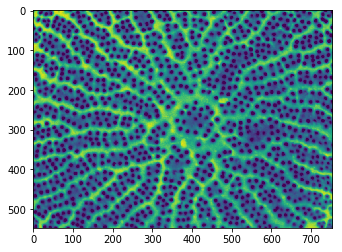

In [2]:
lum_img = img[:,:,0]
plt.imshow(lum_img)

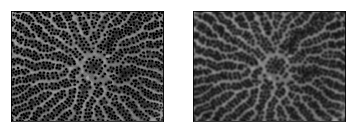

In [3]:
#trying to smooth an image
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('cropped_Wild052.tif')
blur = cv2.blur(img,(14, 14))
plt.subplot(121),plt.imshow(img)
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur)
plt.xticks([]), plt.yticks([])
plt.show()
#for future, showing the plot is unnecessary; can leave that out and put it at the top

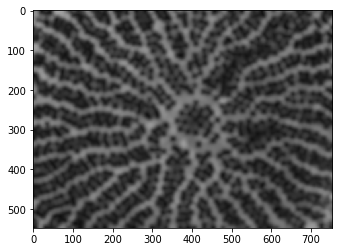

In [4]:
#dilating the blurred image
from skimage.morphology import dilation
dilated_img=dilation(blur)
image=plt.subplot()
image.imshow(dilated_img)

71.0


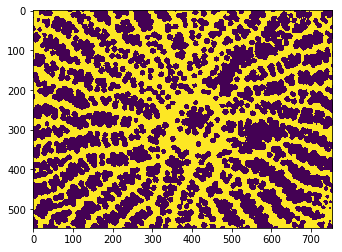

In [5]:
#non blurred threshold
img2 = cv2.imread('cropped_Wild052.tif', 0)
ret,th= cv2.threshold(img2,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print(ret)

lum_img = img[:,:,0] > ret
plt.imshow(lum_img)

/Users/3kh/anaconda3/lib/python3.6/site-packages/skimage/filters/thresholding.py:271: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (548, 754, 3) looks like an RGB image
  warn(msg.format(image.shape))


73


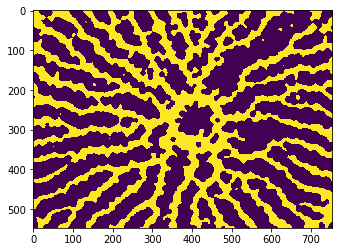

In [6]:
#blurred threshold otsu
from skimage.filters import threshold_otsu
th=threshold_otsu(blur)
print(th)

blur_img = blur[:,:,0] > th
blurimgplot=plt.imshow(blur_img)

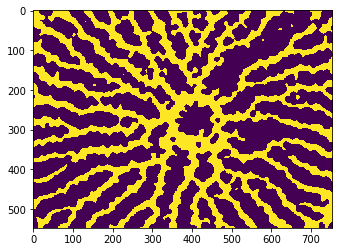

In [7]:
#blurred threshold yen--seems to work slightly better with the little dots in the purple
from skimage.filters import threshold_yen
thyen=threshold_yen(blur)

yenblur = blur[:,:,0] > thyen
blurimgplot=plt.imshow(yenblur)

75


/Users/3kh/anaconda3/lib/python3.6/site-packages/skimage/filters/thresholding.py:271: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (548, 754, 3) looks like an RGB image
  warn(msg.format(image.shape))


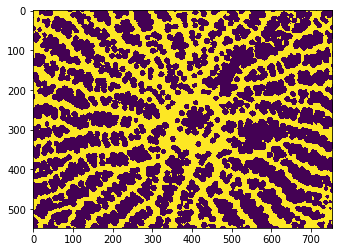

In [8]:
#blurred dilated threshold---too many dots left
from skimage.filters import threshold_otsu
th2=threshold_otsu(dilated_img)
print(th2)

dil_blur = img[:,:,0] > th2
plt.imshow(dil_blur)

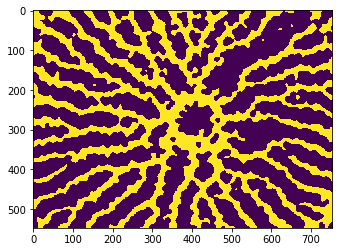

In [9]:
#gets rid of more little dots in the middle of the purple
from skimage.morphology import closing, opening
openimg=opening(yenblur)
image=plt.subplot()
image.imshow(openimg)

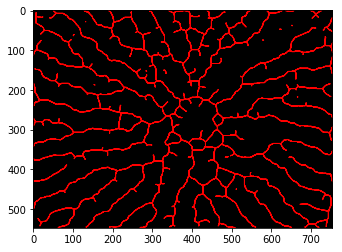

In [10]:
#using blurred,opened; the opening doesn't make much of a difference
from skimage.morphology import skeletonize
yenskeleton = skeletonize(openimg)
ax = plt.subplot()
 
from matplotlib.colors import LinearSegmentedColormap
cdict2 = {'red':   ((0.0, 0.0, 0.0),
                   (0.1, 1.0, 1.0),
                   (1.0, 1.0, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

        'blue':  ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0))
        }
red2 = LinearSegmentedColormap('Red2', cdict2)
ax.imshow(yenskeleton, cmap=red2, interpolation= 'bilinear')
#this is slightly cleaner

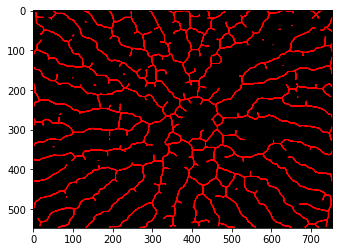

In [11]:
#using blurred
from skimage.morphology import skeletonize
skeleton = skeletonize(blur_img)
ax = plt.subplot()
 
from matplotlib.colors import LinearSegmentedColormap
cdict2 = {'red':   ((0.0, 0.0, 0.0),
                   (0.1, 1.0, 1.0),
                   (1.0, 1.0, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

        'blue':  ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0))
        }
red2 = LinearSegmentedColormap('Red2', cdict2)
ax.imshow(skeleton, cmap=red2, interpolation= 'bilinear')

In [12]:
#this doesn't work; we're not going to try to fix it unless we need a better overlay later
from numpy import zeros
#print(np.shape(skeleton))
#print(np.shape(lum_img))

#print((skeleton))
#use skeleton and lum_img
(r,c)=(np.shape(skeleton))
print(r,c)
pic = zeros(shape=(r,c,3))
pic[:,:,0]=skeleton*(1-lum_img)+lum_img
pic[:,:,1]=(1-skeleton)*lum_img
pic[:,:,2]=(1-skeleton)*lum_img
#print(pic)

#doesn't work
from PIL import Image
#yayihope = Image.fromarray(pic, 'RGB')
#yayihope.show()
#draw=Image.open('cropped_Wild052.tif')
#draw.show()

548 754


/Users/3kh/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


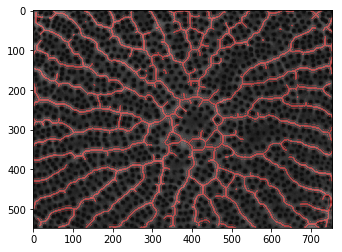

In [13]:
#blurred
img=mpimg.imread('cropped_Wild052.tif')
imgplot = plt.imshow(img, alpha=0.9)
ax = plt.subplot()
ax.imshow(yenskeleton, cmap=red2, interpolation='sinc', alpha=.42) 
plt.show()